# CT = GT+Markov, LS on D1 vs. D9

In [32]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.patches as mpatches
import sys
sys.path.append('../..')
from data_import import*
from helper import*
from plot_params import*
pp = PlotParams()
from paths import*

In [33]:
paths = paths()
f4_path = paths.f4_path + '/4e9c1cf/'

In [34]:
data_raw = import_and_transform_data(f4_path, 'NOGTHSH_LEARNING_CURVES_4e9c1cf_9A_23_09_05.csv')
data_tag, data_raw = data_raw

In [92]:
####################
#### Filter the data
data = drop_RTs_above_3std_below_180(data_raw)

In [93]:
corr_matrix = (data
                   .groupby(['model', 'participant', 'e_train', 'e_test', 'day'])
                   [['rt','rt_predicted']]
                   .corr())
corr_matrix.reset_index(inplace = True)
corr_matrix.drop(['level_5', 'rt'], axis = 1, inplace = True)
matrix = corr_matrix.loc[corr_matrix['rt_predicted'] !=1]
matrix['r_sqr'] = matrix.rt_predicted**2
matrix.drop('rt_predicted', axis = 1, inplace = True)
matrix;

In [94]:
data_ct_m =  matrix.pivot(index = ['participant', 'day'], columns = 'model', values = 'r_sqr')
data_ct_m['m_ct_diff'] = data_ct_m['iHMM'] - data_ct_m['Markov'] 

## CT vs. Markov + GT

In [95]:
data_ct_m2 = data_ct_m
data_ct_m2.reset_index(inplace = True)
data_ct_m2 = data_ct_m2.loc[data_ct_m2['day'].isin([1, 8, 9])]
data_ct_m2 = data_ct_m2.groupby(['day', 'participant']).sum()
data_ct_m2['GT_Markov'] = data_ct_m2['GroundTruth'] + data_ct_m2['Markov']
data_ct_m2.reset_index(inplace=True)

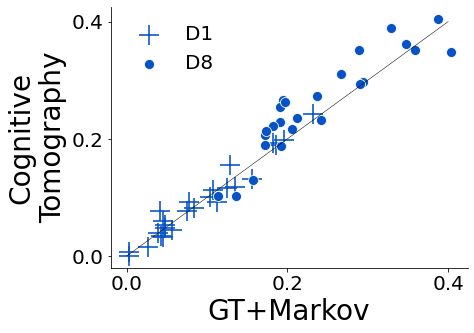

In [96]:
fig, axs = plt.subplots(figsize = pp.figsize, facecolor = 'white')


sns_plot = sns.scatterplot(data = data_ct_m2.loc[data_ct_m2['day'] == 1], 
                           x = 'GT_Markov',
                           y = 'iHMM',
                           marker = '+',
                           s = 400,
                           color = pp.basic_color,
                           label = 'D1'
                          )


sns_plot = sns.scatterplot(data = data_ct_m2.loc[data_ct_m2['day'] == 8], 
                           x = 'GT_Markov',
                           y = 'iHMM',
                           marker = 'o',
                           s = pp.markersize_seaborn,
                           alpha = 1,
                           color = '#0653C7',
                           label = 'D8'
                          )



sns_plot = sns.lineplot(x = [0,0.4], y = [0, 0.4], color = 'black', linewidth = 0.5)

sns_plot.set_yticks([0., 0.2, 0.4])
sns_plot.set_xticks([0., 0.2, 0.4])

sns_plot.set_xticklabels([0., 0.2, 0.4], fontsize = pp.ticklabsize)
sns_plot.set_yticklabels([0., 0.2, 0.4], fontsize = pp.ticklabsize)

sns_plot.set_xlabel('GT+Markov', fontsize = pp.axlabsize )
sns_plot.set_ylabel('Cognitive\nTomography', fontsize = pp.axlabsize)

sns_plot.legend(frameon = False, fontsize = pp.legendfontsize)
sns.despine()

In [97]:
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'CT_GTMarkov.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'CT_GTMarkov.png', bbox_inches='tight')

In [98]:
data_ct_m2.dropna(inplace=True)
r, p = sp.stats.pearsonr(x=data_ct_m2.GT_Markov, y=data_ct_m2.iHMM)

In [99]:
print ('r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))

r=0.953, p=0.000***


In [100]:
D1_means = pd.DataFrame(data_ct_m2.loc[data_ct_m2['day'] == 1][['GT_Markov', 'iHMM']].mean(axis = 0)).transpose()
D8_means = pd.DataFrame(data_ct_m2.loc[data_ct_m2['day'] == 8][['GT_Markov', 'iHMM']].mean(axis = 0)).transpose()
D9_means = pd.DataFrame(data_ct_m2.loc[data_ct_m2['day'] == 9][['GT_Markov', 'iHMM']].mean(axis = 0)).transpose()

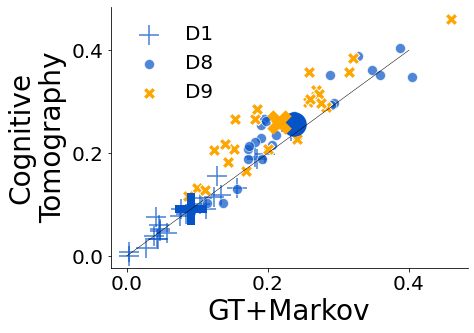

In [102]:
fig, axs = plt.subplots(figsize = pp.figsize, facecolor = 'white')


sns_plot = sns.scatterplot(data = data_ct_m2.loc[data_ct_m2['day'] == 1], 
                           x = 'GT_Markov',
                           y = 'iHMM',
                           marker = '+',
                           s = 400,
                           alpha = 0.7,
                           color = pp.basic_color,
                           label = 'D1'
                          )


sns_plot = sns.scatterplot(data = data_ct_m2.loc[data_ct_m2['day'] == 8], 
                           x = 'GT_Markov',
                           y = 'iHMM',
                           marker = 'o',
                           s = pp.markersize_seaborn,
                           alpha = 0.7,
                           color = '#0653C7',
                           label = 'D8'
                          )



sns_plot = sns.scatterplot(data = data_ct_m2.loc[data_ct_m2['day'] == 9], 
                           x = 'GT_Markov',
                           y = 'iHMM',
                           marker = 'X',
                           s = 150,
                           alpha = 1,
                           color = 'orange',
                           label = 'D9'
                          )


sns.scatterplot(data = D1_means, x = 'GT_Markov', y = 'iHMM', color = pp.basic_color,
               marker = '+',
               s = 1000, 
               linewidth = 8)

sns.scatterplot(data = D8_means, x = 'GT_Markov', y = 'iHMM', color = pp.basic_color,
               marker = 'o',
               s = 600,
               linewidth = 0)

sns.scatterplot(data = D9_means, x = 'GT_Markov', y = 'iHMM', color = 'orange',
               marker = 'X',
               s = 600,
               linewidth = 0)




sns_plot = sns.lineplot(x = [0,0.4],y= [0, 0.4], color = 'black', linewidth = 0.5)

sns_plot.set_yticks([0., 0.2, 0.4])
sns_plot.set_xticks([0., 0.2, 0.4])

sns_plot.set_xticklabels([0., 0.2, 0.4], fontsize = pp.ticklabsize)
sns_plot.set_yticklabels([0., 0.2, 0.4], fontsize = pp.ticklabsize)

sns_plot.set_xlabel('GT+Markov', fontsize = pp.axlabsize )
sns_plot.set_ylabel('Cognitive\nTomography', fontsize = pp.axlabsize)

sns_plot.legend(frameon = False, fontsize = pp.legendfontsize)
sns.despine()

In [103]:
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'CT_GTMarkov_D189.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'CT_GTMarkov_D189.png', bbox_inches='tight')

# Calculate learning strength

In [104]:
data_diff = data_ct_m.reset_index()
data_diff.drop('index', axis = 1, inplace = True)
data_diff = pd.DataFrame(data_diff)
data_diff = (data_diff
                    .groupby(['participant', 'day'])
                    .mean()        
            )
data_diff = (data_diff
     .stack()
     .reset_index()
      .pivot_table(index = 'participant', columns = ['day', 'model'])
 
)
data_diff.columns = data_diff.columns.droplevel(0)
data_diff;

In [105]:
header1 = ['day_'+ str(int(item[0]))for item in data_diff.columns]
header2 = [item[1] for item in data_diff.columns]
multiindex = pd.MultiIndex.from_arrays([header1, header2], names=["day", "model"])
len(multiindex)
data_diff.columns = multiindex

In [106]:
data_diff['avg_diff_d5_8'] = (data_diff
                                  [[('day_5', 'm_ct_diff'), 
                                    ('day_6', 'm_ct_diff'), 
                                    ('day_7', 'm_ct_diff'), 
                                    ('day_8', 'm_ct_diff')]]
                                    .mean(axis = 1))

# T-tests to evaluate LS on D1 and D9

### T-test: H1: D1 LS is different from D9 LS (repeated measures)

In [107]:
t_test = sp.stats.ttest_rel(data_diff.day_1.m_ct_diff, data_diff.day_9.m_ct_diff, alternative='less')
t_value, p_value = t_test
print(f'Dependent t-test p-value: {p_value:.3f}, t-value: {t_value:.3f}, df: {t_test.df }.')
t_test.df

Dependent t-test p-value: 0.000, t-value: -6.686, df: 24.


24

### T-test: H1: D1 LS and D9 LS differs from zero

In [108]:
freedom = data_diff.day_1.m_ct_diff.shape[0]-1
t_val, p_val = sp.stats.ttest_1samp(data_diff.day_1.m_ct_diff, popmean = 0, alternative = 'greater')
print(f'Independent t-test p-value: {p_val:.3f}{get_stars(p_val)}, t-value: {t_val:.3f}.')
print ('DF = ', freedom)

Independent t-test p-value: 0.181, t-value: 0.930.
DF =  24


In [109]:
freedom = data_diff.day_9.m_ct_diff.shape[0]
t_val, p_val = sp.stats.ttest_1samp(data_diff.day_9.m_ct_diff, popmean = 0, alternative = 'greater')
print(f'Independent t-test p-value: {p_val:.3f}{get_stars(p_val)}, t-value: {t_val:.3f}.')
print ('DF = ', freedom-1)

Independent t-test p-value: 0.000***, t-value: 7.175.
DF =  24


# Learning strength on day 8 vs. day 9

In [110]:
data_diff.reset_index(inplace=True)
data_diff.set_index('participant', inplace = True)

In [111]:
violin_data = data_diff.loc[:, [('day_5', 'iHMM'), ('day_6', 'iHMM'), ('day_7', 'iHMM'), ('day_8', 'iHMM')]].reset_index()
violin_data.columns = ['participant', 'D5', 'D6', 'D7', 'D8']
violin_data2 = pd.DataFrame(violin_data.set_index('participant').unstack()).reset_index('participant')
violin_data2.columns = ['participant', 'RT']
vio = data_diff.loc[:,[('day_1', 'm_ct_diff'), ('day_9', 'm_ct_diff')]]#.reset_index()
vio.columns = [ 'CT_advtg_d1', 'CT_advtg_d9']
vio = pd.DataFrame(vio.transpose().stack())
vio.reset_index(inplace=True)
vio.columns = ['day', 'participant', 'r_sqr']

## LS on D1 vs. LS on D8

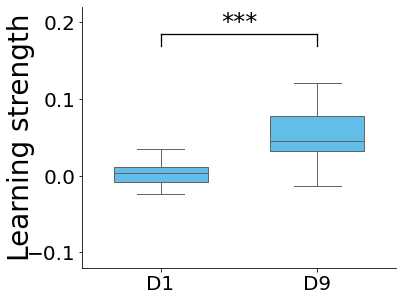

In [112]:
fig, axs = plt.subplots(figsize = pp.figsize, facecolor = 'white')
## palette = {'CT_advtg_d1': "lightsteelblue", 'CT_advtg_d9': "#ffe567"}
palette = {'CT_advtg_d1': '#4dc4ff', 'CT_advtg_d9': '#4dc4ff'}
#palette = {'CT_advtg_d1': pp.basic_color, 'CT_advtg_d9': pp.basic_color}



sns_plot = sns.boxplot(x="day", y="r_sqr", hue= 'day', data=vio, palette = palette, width = 0.6)
sns_plot.set_xlabel(None)
sns_plot.set_ylabel("Learning strength", fontsize = pp.axlabsize)
sns_plot.yaxis.set_label_coords(-0.15, 0.5)

#axs.set_title("A: Updated inductive biases after learning", x = 0.3, y = 1.1,  fontsize=18, pad=20)
plt.legend([],[], frameon=False)



#sns_plot.set_xlim(-1,2)
sns_plot.set_ylim(-0.12, 0.22)

############################################################
######### Significance notation
############################################################
plt.axhline(y = .185, xmin = .25, xmax = 0.75, color = 'black', lw = 1.3)

ymin, ymax = 0.85, 0.895
plt.axvline(x = 0, ymin = ymin, ymax = ymax, color = 'black', lw = 1.3)
plt.axvline(x = 1, ymin = ymin, ymax = ymax, color = 'black', lw = 1.3)
plt.text(0.39,0.19,'***', size = pp.starsize)

############################################################

sns_plot.spines["top"].set_visible(False)
sns_plot.spines["right"].set_visible(False)

#sns_plot.set_xticks([-0.2, 1.2])
plt.yticks([-0.1, 0, 0.1, 0.2], fontsize = pp.ticklabsize)
sns_plot.set_xticks([0, 1])
sns_plot.set_xticklabels(['D1', 'D9'], fontsize = pp.ticklabsize)
plt.gcf().subplots_adjust(left=0.22);

## Calculate means and stds

In [113]:
mean = vio.loc[vio['day'] == 'CT_advtg_d1'].r_sqr.mean()
std = vio.loc[vio['day'] == 'CT_advtg_d1'].r_sqr.std()
print (f'D1 mean:, {mean:.3f}, std: {std:.3f}')

mean = vio.loc[vio['day'] == 'CT_advtg_d9'].r_sqr.mean()
std = vio.loc[vio['day'] == 'CT_advtg_d9'].r_sqr.std()
print (f'D9 mean: {mean:.3f}, std: {std:.3f}')

#print('previous means:\nD1 mean:, 0.004, std: 0.010\nD9 mean: 0.045, std: 0.042')

D1 mean:, 0.003, std: 0.014
D9 mean: 0.053, std: 0.037


In [114]:
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'LS_D1_D9_blue.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'LS_D1_D9_blue.png', bbox_inches='tight')

# LS on D5-D8

In [115]:
LS_d5_d8 = data_diff[[('day_5', 'm_ct_diff'), ('day_6', 'm_ct_diff'), ('day_7', 'm_ct_diff'),( 'day_8', 'm_ct_diff')]]
median_ls_sorted = LS_d5_d8.median(axis = 1).sort_values()
mean_ls_d5_d8 = LS_d5_d8.median(axis = 1).sort_values()
participants_ordered = mean_ls_d5_d8.index
LS_d5_d8 = LS_d5_d8.stack(0)
LS_d5_d8.reset_index(inplace=True)
LS_d5_d8.columns.name = None

In [116]:
################################################
################################################
def get_arrow(participant_num):
    x_tail = participant_num
    y_tail = -0.055
    x_head = participant_num
    y_head = 0.0
    dx = x_head - x_tail
    dy = y_head - y_tail
    arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                     mutation_scale=20, color = 'grey')
    return (arrow)

In [117]:
np.where(participants_ordered == 111)[0][0]

24

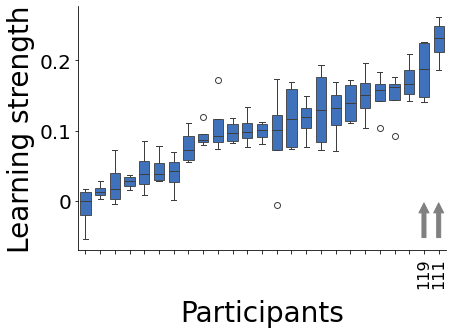

In [118]:
fig, axs = plt.subplots(figsize = pp.figsize, facecolor = 'white')


#############################################
### Boxplot for D5-D8 
#############################################
sns_plot = sns.boxplot(data = LS_d5_d8, 
                       x="participant", y="m_ct_diff", 
                       color = pp.basic_color,
                       order=median_ls_sorted.index,
                       width=0.7,
                       boxprops=dict(alpha=.85))

########################################
## Labels, legends, title 
########################################

sns_plot.set_ylabel("Learning strength", fontsize = pp.axlabsize)
sns_plot.set_xlabel('Participants', fontsize = pp.axlabsize)
axs.xaxis.set_label_coords(0.5, -0.2)

##########################################
## Ticks, axes
##########################################
two_ticklab = [item if item in [119, 111] else '' for item in participants_ordered]
sns_plot.set_xticks(np.arange(len(participants_ordered)))
sns_plot.set_xticklabels(two_ticklab, rotation = 90, fontsize = 16)

sns_plot.set_yticks([0, 0.1, 0.2])
sns_plot.set_yticklabels([0, 0.1, 0.2], fontsize = pp.ticklabsize)

sns_plot.spines["top"].set_visible(False)
sns_plot.spines["right"].set_visible(False)

plt.tight_layout()


##########################################
## Add arrows
##########################################
#participants_ordered = np.array(median_ls_sorted.index)
idx_119 = np.where(participants_ordered == 119)[0][0]
idx_111 = np.where(participants_ordered == 111)[0][0]

sns_plot.add_patch(get_arrow(idx_119))
sns_plot.add_patch(get_arrow(idx_111));


In [119]:
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'LS_D5-D8.pdf')
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'LS_D5-D8.png')

## Saving the learning strength 

In [166]:
#LS_d5_d8 = pd.DataFrame(mean_ls_d5_d8, columns = ['LS_mean_d5_d8'])
#LS_d5_d8.to_csv(paths.local_data + '/LS_mean_D5_D8_recalc.csv')